### Plasma Sheath, Cylindrical Langmuir Probe, Radial model

First, we set the kind of plasma. Uncomment the line that corresponds

RadioButtons(description='Plasma type:', options=('Argon and electrons', 'Neon and electrons', 'Helium and ele…

Text(value='')

<IPython.core.display.Javascript object>


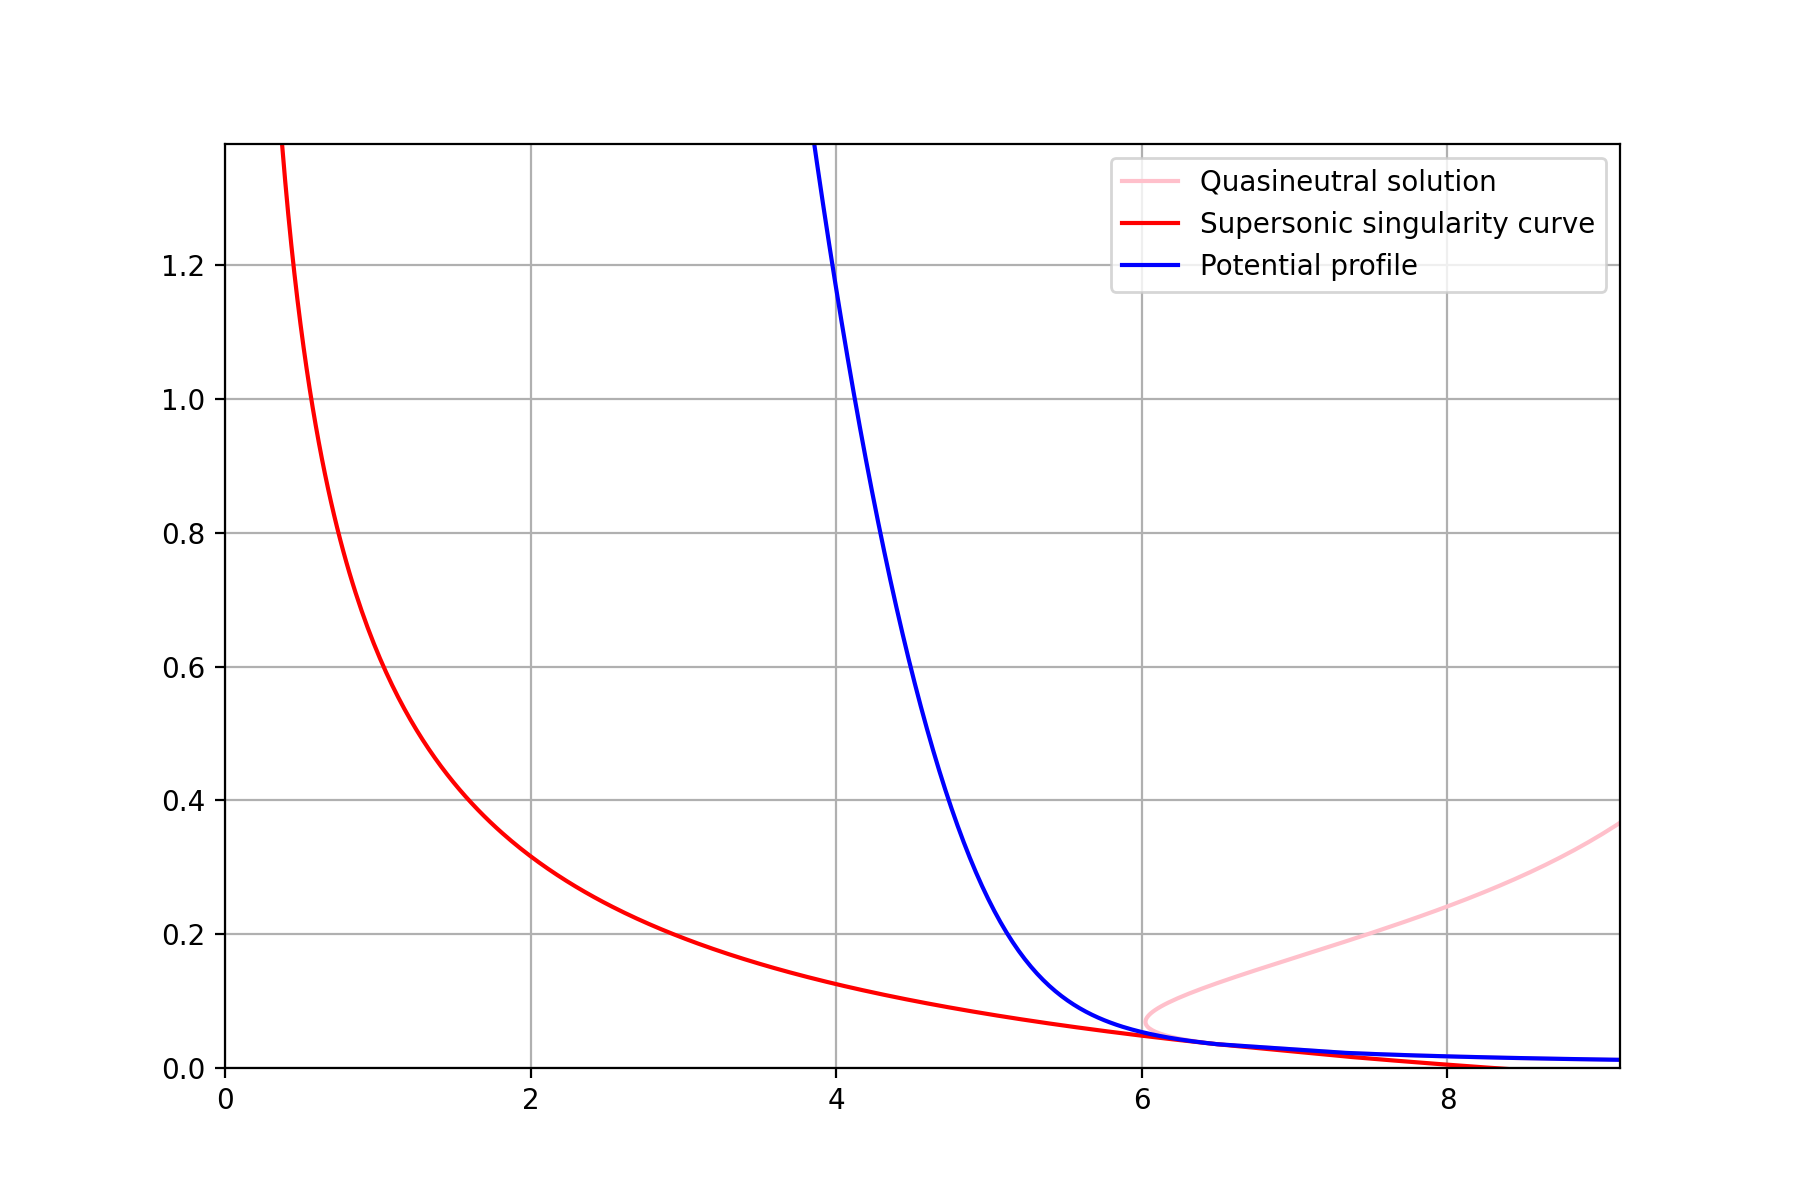

<IPython.core.display.Javascript object>


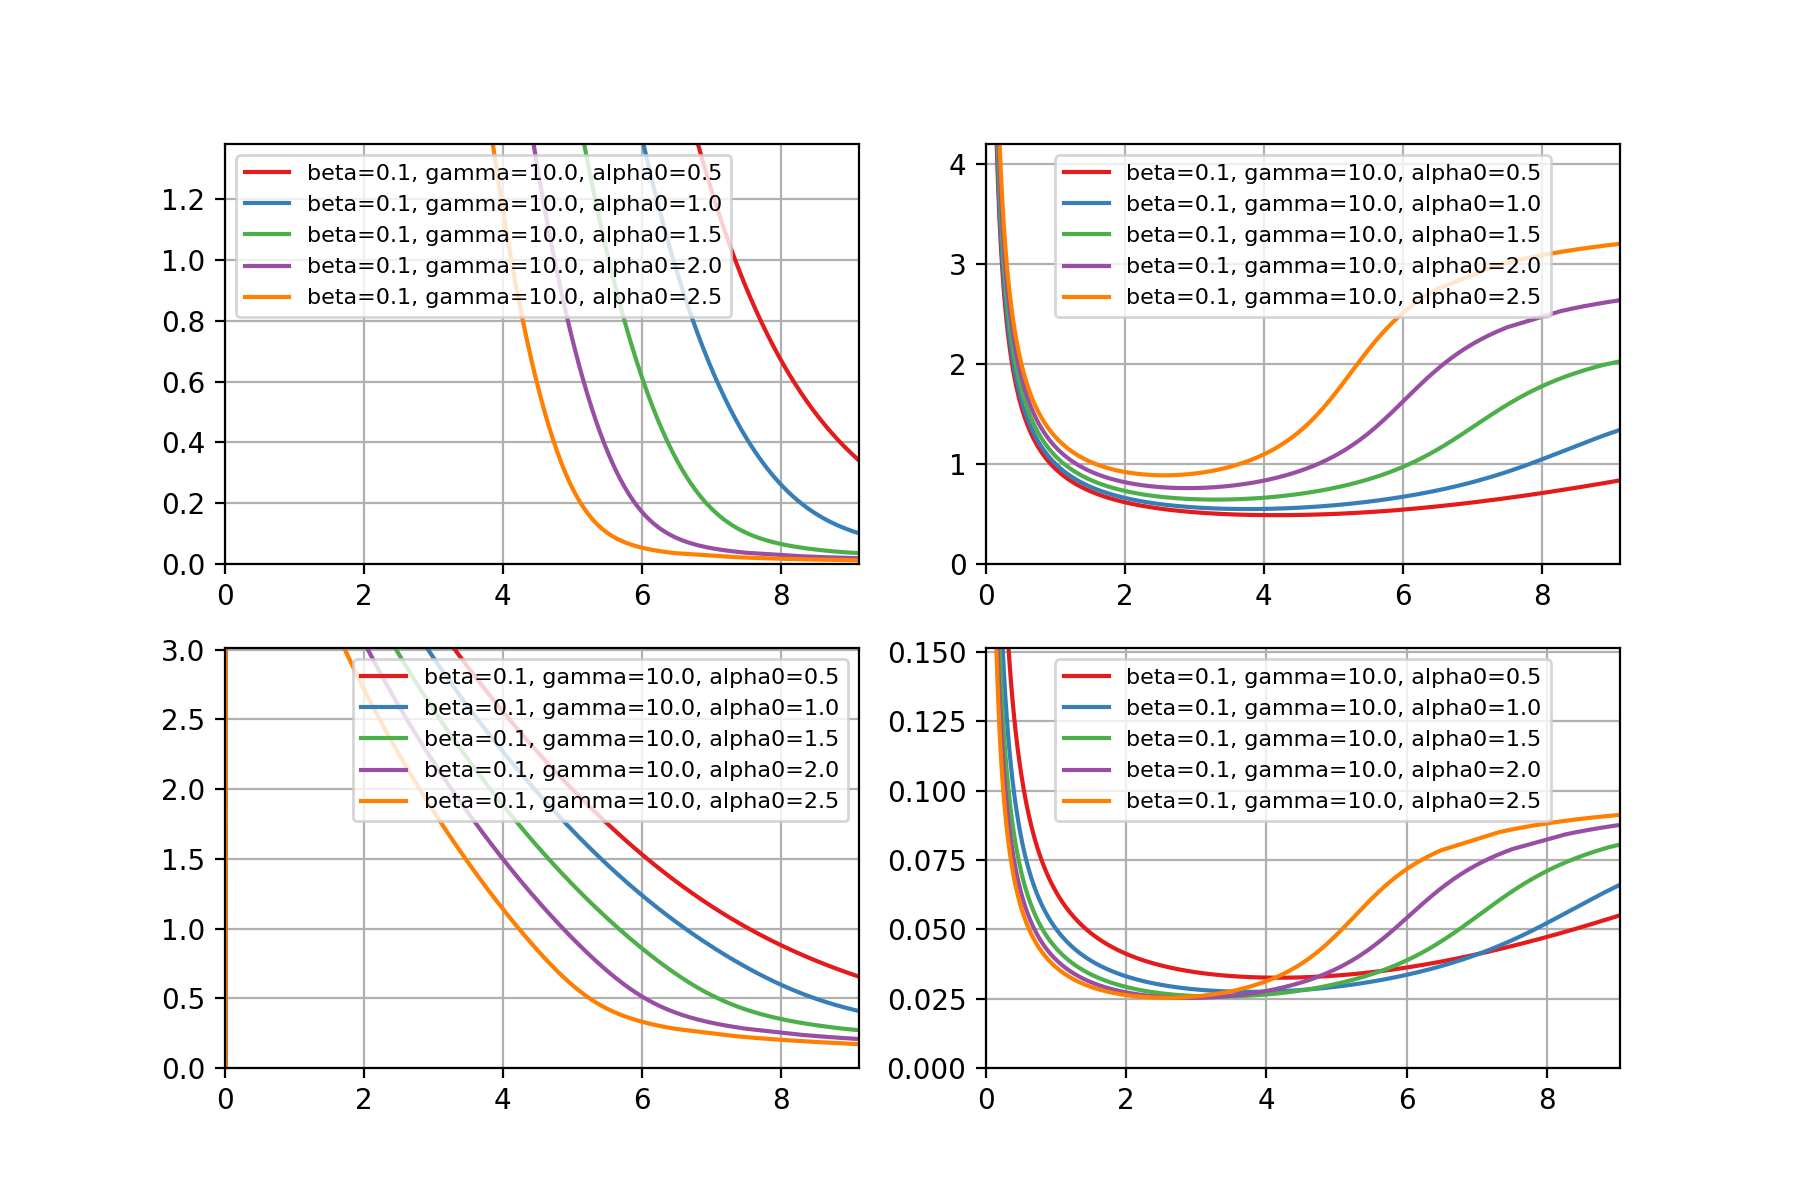

/Users/Billy/projects/jupyter/bg_sheath/functions.py:120: RuntimeWarning: invalid value encountered in double_scalars
  y0 = 3*(beta*Ip/(x0*(1+alpha0)))**(2/3) - 2*beta
/Users/Billy/projects/jupyter/bg_sheath/functions.py:159: RuntimeWarning: invalid value encountered in sqrt
  x = Ip/(c*np.sqrt(y-2*beta*(c/(1+alpha0)-1)))


In [1]:
import initialize
import sheath
import functions as f
from ipywidgets import widgets
import matplotlib.pyplot as plt

%matplotlib notebook

# Display sliders and options
plasma_radio_buttons = widgets.RadioButtons(
    options=["Argon and electrons", "Neon and electrons", "Helium and electrons", "Oxygen O+ and O-"],
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Plasma type:')
display(plasma_radio_buttons)

bg = initialize.BetaGammaSheath()
bg.x_array = []
bg.y_array = []
bg.z_array = []
bg.N_array = []

beta_slider = widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='beta:')
gamma_slider = widgets.FloatSlider(value=10, min=1.0, max=100.0, step=0.1, description='gamma:')
alpha0_slider = widgets.FloatSlider(value=0.5, min=0.0, max=10.0, step=0.1, description='alpha0:')
#beta_slider = widgets.FloatSlider(value=0.1, min=0.0, max=1.0, step=0.01, description='beta:')

sliders = widgets.VBox([beta_slider, gamma_slider, alpha0_slider])
display(sliders)

run_button = widgets.Button(description = "Run calculation")
quasi_toogle_button = widgets.ToggleButton(value=True, description='Plot quasineutral')
supersonic_toogle_button = widgets.ToggleButton(value=True, description='Supersonic curve')
run_plot_buttons = widgets.HBox([run_button, quasi_toogle_button, supersonic_toogle_button])

display(run_plot_buttons)

info_text = widgets.Text()
display(info_text)

fig1, ax1 = plt.subplots(figsize=(9, 6))  # Create a figure containing a single axes.
ax1.set(xlabel='Distance to the axis (lambda_D units)', ylabel='Electric potential (k_BT_e/e units)')
ax1.grid(b = True)

fig2, ax2 = plt.subplots(2,2,figsize=(9, 6))  # Create a figure for the comparison of several parameters
ax2_11, ax2_12, ax2_21, ax2_22 = ax2.flatten()
ax2_11.grid(b = True)
ax2_12.grid(b = True)
ax2_21.grid(b = True)
ax2_22.grid(b = True)

palette = plt.get_cmap('Set1')
i_palette = -1

def get_y_sing(x0a):
    '''Helper function to get singularity curve'''
    global bg
    [x0, y0, ydot0, xl] = f.getInitFloat(x0a, bg)
    return y0

def run_button_clicked(b):
    '''Helper function to pass arguments'''
    info_text.value = "Calculation in progress"
    
    # Pass parameters to bg
    global bg
    global i_palette
    bg.g.beta = beta_slider.value
    bg.g.gamma = gamma_slider.value
    bg.g.alpha0 = alpha0_slider.value
    bg.p = initialize.Plasma(plasma_radio_buttons.value)
    sheath.cylindrical(bg) #Note that adimensional plasma sheath solution does not depend on the plasma type
    info_text.value = "Calculation finished"
    
    # Plot according to given options
    ax1.cla()
    ax1.grid(b = True)

    # Quasineutral solution
    if quasi_toogle_button.value:
        bg.quasi_x_array = [f.getxCI(y, bg) for y in bg.y_array]
        ax1.plot(bg.quasi_x_array, bg.y_array, color='pink', label="Quasineutral solution")
    
    # Supersonic singularity curve
    if supersonic_toogle_button.value:
        bg.supersonic_y_array = [get_y_sing(x) for x in bg.x_array]
        ax1.plot(bg.x_array, bg.supersonic_y_array, color='red', label="Supersonic singularity curve")
    
    ax1.plot(bg.x_array, bg.y_array, color='blue', label="Potential profile")
    ax1.legend(prop={'size': 10})
    
    # Plot limits
    ax1.set_xlim(0, 1.1*bg.g.xl)
    ax1.set_ylim(0, 40*f.getylimit(bg))
    
    i_palette += 1
    # Plot other parameters, first potential again
    ax2_11.plot(bg.x_array, bg.y_array, color=palette(i_palette),
                label="beta={0}, gamma={1}, alpha0={2}".format(bg.g.beta, bg.g.gamma, bg.g.alpha0))
    ax2_11.set_xlim(0, 1.1*bg.g.xl)
    ax2_11.set_ylim(0, 40*f.getylimit(bg))
    ax2_11.legend(prop={'size': 8})
    
    # Then ion density
    ax2_12.plot(bg.x_array, bg.N_array, color=palette(i_palette),
                label="beta={0}, gamma={1}, alpha0={2}".format(bg.g.beta, bg.g.gamma, bg.g.alpha0))
    ax2_12.set_xlim(0, 1.1*bg.g.xl)
    ax2_12.set_ylim(0, 1.2*(1 + bg.g.alpha0))
    ax2_12.legend(prop={'size': 8})
    
    # Velocity
    ax2_21.plot(bg.x_array, bg.V_array, color=palette(i_palette),
                label="beta={0}, gamma={1}, alpha0={2}".format(bg.g.beta, bg.g.gamma, bg.g.alpha0))
    ax2_21.set_xlim(0, 1.1*bg.g.xl)
    ax2_21.set_ylim(0, 5*bg.g.Ip/bg.g.xl)
    ax2_21.legend(prop={'size': 8})
    
    # Local ion temperature
    ax2_22.plot(bg.x_array, bg.T_array, color=palette(i_palette),
                label="beta={0}, gamma={1}, alpha0={2}".format(bg.g.beta, bg.g.gamma, bg.g.alpha0))
    ax2_22.set_xlim(0, 1.1*bg.g.xl)
    ax2_22.set_ylim(0, 1.5*beta)
    ax2_22.legend(prop={'size': 8})
    

run_button.on_click(run_button_clicked)

